In [29]:
import numpy as np
from scipy.special import hankel1, roots_hermitenorm, roots_chebyt
import matplotlib.pyplot as plt

In [2]:
def U(x,y,U0 = 1, k = 512,sigma = 1):
    return U0*np.exp(1j*k*x-(y**2)/(2*sigma**2))

def Integranda(x,y,xs,ys,k = 512):
    return k/2*U(xs,ys)*hankel1(0,np.sqrt((x-xs)**2+(y-ys)**2)*k)


def plotfunc(a,b,N,f,nome=''):
    X = np.linspace(a,b,N)
    Y = f(X)
    plt.plot(X,Y,label=nome)
    plt.legend()

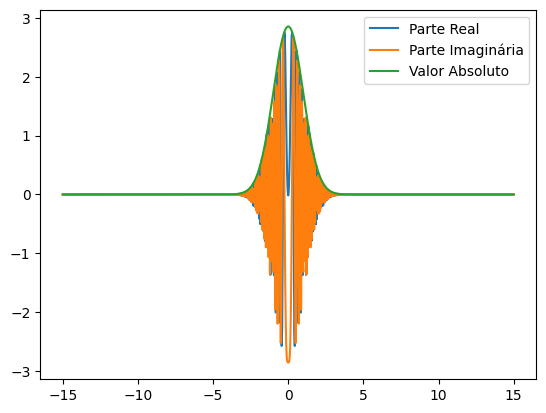

In [55]:
plotfunc(-15,15,1000,lambda y : Integranda(10,0,0,y).real ,"Parte Real")
plotfunc(-15,15,1000,lambda y : Integranda(10,0,0,y).imag , "Parte Imaginária")
plotfunc(-15,15,1000,lambda y : abs(Integranda(10,0,0,y)) , "Valor Absoluto")


In [4]:
def SimpsonAdaptative(a,b,f):
    e0 = np.inf
    S0 = (f(a)+f(b))/3
    T0 = 2*f((a+b)/2)/3
    I0 = (a-b)*(S0+2*T0)/2
    n = 2
    print("I\te")
    while True:
        N = 2*n+1

        S = S0+T0
        S0 = S
        
        t, h = np.linspace(a,b,N,retstep=1)
        T = 2*np.sum(f(t[1:-1:2]))/3
        T0 = T

        I = h*(S+2*T)
        e = abs(I-I0)/15 
        
        
        if abs(e-e0)<10**-10:
            break
        e0 = e
        I0 = I
        print(I,"\t", e)
        n *= 2
    return I


In [5]:
SimpsonAdaptative(-15,15,lambda y : Integranda(10,0,0,y))

I	e
(-0.15202736530201816-14.272183220034874j) 	 4.7576642983971595
(-0.06294164780047666-7.115472917932549j) 	 0.4771509829220391
(2.2785498135181728-4.338362058834505j) 	 0.24216548049398343
(-1.51864991788927+2.259688455890931j) 	 0.50751243616977
(-2.0021567419540025-3.9405816442013335j) 	 0.4146062558514754
(0.40954785797334115-2.372879720539448j) 	 0.19176384085946138
(-0.1567228928646822+0.5650564477529862j) 	 0.19946741858387115
(1.0677571733295468-1.1524058029963176j) 	 0.14061812772747945
(0.6685858869029445-0.6567790251634602j) 	 0.04242554884408681
(0.6924594094067322-0.7213082729836775j) 	 0.00458692290998461
(0.6924769962039585-0.7213104323303329j) 	 1.1812577377186142e-06
(0.6924769962040273-0.7213104323301638j) 	 1.216794080066942e-14


(0.6924769962040794-0.7213104323301499j)

In [6]:
def RombergTable(a,b,emin,f,retPoints=0,retError=0):
    e = np.inf
    h = (b-a)
    N = int(np.log(h/emin))
    E = np.zeros(N)
    Points = np.zeros(N)
    R = np.zeros((N,N),dtype=complex)
    R[0, 0] = ((f(a)+f(b))*h)/2
    E[0] = e
    Points[0] = 1
    n = 1
    i = 1
    while E[i-1] > emin:
        Points[i] = 2*n+1
        t,h = np.linspace(a,b,int(Points[i]),retstep=1)
        R[i, 0] = R[i-1, 0] / 2 + np.sum(f(t[1:-1:2]))*h
        for m in range(i):
            R[i, m+1] = R[i, m] + (R[i, m]-R[i-1, m])/(4**(m+1) - 1)

        E[i] = abs(R[i, i-1]-R[i-1, i-1])/(4**i-1)
        i += 1
        n *= 2
    R = np.trim_zeros(np.diagonal(R))
    E = np.trim_zeros(E)
    Points = np.trim_zeros(Points)
    if not(retPoints or retError):
        return R
    if retPoints and not(retError):
        return R, Points
    if retError and not(retPoints):
        return R, E
    if retPoints and retError:
        return R, Points, E

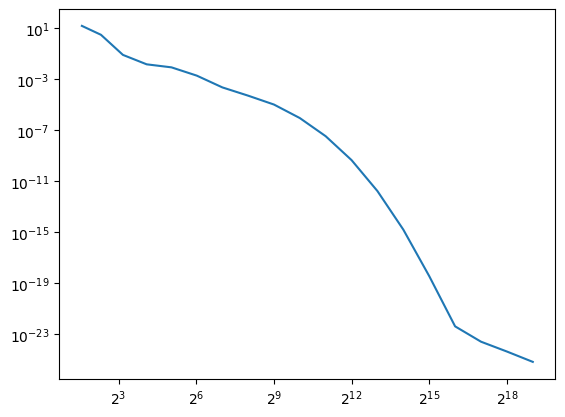

In [7]:
fig,ax = plt.subplots()
ax.plot(RombergTable(-15,15,10**-25,lambda y : Integranda(10,0,0,y),retPoints=1)[1],RombergTable(-15,15,10**-25,lambda y : Integranda(10,0,0,y),retError=1)[1])
ax.set_yscale("log")
ax.set_xscale("log",base=2)
plt.show()

In [23]:
def GaussHermite(N,f):
    x,w = roots_hermitenorm(N)
    return np.inner(f(x),w)

def IntegrandaHermite(x,y,xs,ys,U0 = 1,k = 512):
    return k/2*U0*hankel1(0,np.sqrt((x-xs)**2+(y-ys)**2)*k)

In [24]:
GaussHermite(100000,lambda y : IntegrandaHermite(10,0,0,y))

(0.6924769962041082-0.7213104323338226j)

In [48]:
def GaussChebyshev(a,b,N,f):
    x,w = roots_chebyt(N)
    X = (b-a)/2*x-(b+a)/2
    W = (b-a)/2*w

    return np.sum(f(X)*W*np.sqrt(1-x**2))


In [52]:
GaussChebyshev(-15,15,100000, lambda y : Integranda(10,0,0,y))

(0.6924769962040365-0.7213104323301727j)